In [47]:
import pandas as pd
data = pd.read_csv('17100009.csv')
data.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0


In [48]:
data.shape

(3937, 14)

In [49]:
data.dtypes

REF_DATE          object
GEO               object
DGUID             object
UOM               object
UOM_ID             int64
SCALAR_FACTOR     object
SCALAR_ID          int64
VECTOR            object
COORDINATE         int64
VALUE              int64
STATUS           float64
SYMBOL           float64
TERMINATED        object
DECIMALS           int64
dtype: object

In [50]:
data['REF_DATE'] = pd.to_datetime(data['REF_DATE'], format='%Y-%m')


In [51]:
data.dtypes

REF_DATE         datetime64[ns]
GEO                      object
DGUID                    object
UOM                      object
UOM_ID                    int64
SCALAR_FACTOR            object
SCALAR_ID                 int64
VECTOR                   object
COORDINATE                int64
VALUE                     int64
STATUS                  float64
SYMBOL                  float64
TERMINATED               object
DECIMALS                  int64
dtype: object

In [52]:
data.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0


In [53]:
canada_data = data[data['GEO'] == "Canada"]

In [54]:
canada_data.shape

(313, 14)

In [55]:
canada_data.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0


In [56]:
canada_data = canada_data[['REF_DATE', 'VALUE']]

In [57]:
canada_data.shape

(313, 2)

In [58]:
canada_data.head()

,REF_DATE,VALUE
0,1946-01-01,12188000
1,1946-04-01,12241000
2,1946-07-01,12316000
3,1946-10-01,12393000
4,1947-01-01,12450000


In [59]:
canada_data.dtypes

REF_DATE    datetime64[ns]
VALUE                int64
dtype: object

In [60]:
canada_data.set_index('REF_DATE', drop=True, inplace=True)

In [61]:
canada_data.head()

,VALUE
REF_DATE,
1946-01-01,12188000
1946-04-01,12241000
1946-07-01,12316000
1946-10-01,12393000
1947-01-01,12450000


# Exponential Smoothing using statsmodels

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing

In [63]:
model = ExponentialSmoothing(canada_data['VALUE'], trend='add', seasonal='add', seasonal_periods=4)
fit_model = model.fit()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [64]:
future_dates = pd.date_range(start=canada_data.index[-1] + pd.offsets.QuarterBegin(1), 
                             end='2051-01-01', 
                             freq='QS')
forecast = fit_model.forecast(len(future_dates))
forecast.index = future_dates
forecast

2024-04-01    4.105374e+07
2024-07-01    4.140266e+07
2024-10-01    4.177163e+07
2025-01-01    4.202171e+07
2025-04-01    4.230431e+07
                  ...     
2050-01-01    7.328608e+07
2050-04-01    7.356868e+07
2050-07-01    7.391760e+07
2050-10-01    7.428657e+07
2051-01-01    7.453665e+07
Freq: QS-JAN, Length: 108, dtype: float64

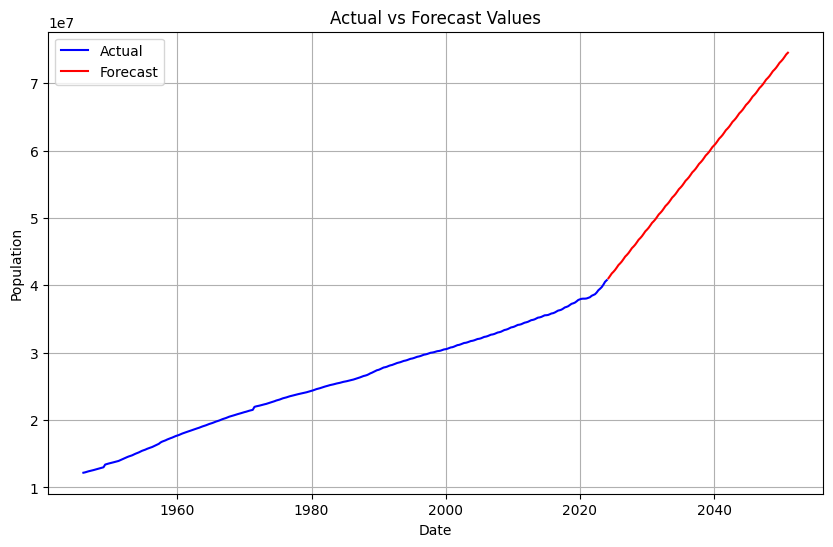

In [65]:
import matplotlib.pyplot as plt

# Assuming canada_data and forecast are already defined as specified
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(canada_data.index, canada_data['VALUE'], label='Actual', color='blue')  # Plot actual data
plt.plot(forecast.index, forecast, label='Forecast', color='red')  # Plot forecast data

# Adding title and labels
plt.title('Actual vs Forecast Values')
plt.xlabel('Date')
plt.ylabel('Population')

# Adding a legend to differentiate actual and forecast
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid for better readability of the plot
plt.show()

# AutoETS using statsforecast

In [66]:
data

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2024-01-01,Alberta,2016A000248,Persons,249,units,0,v15,10,4800768,NaN,NaN,NaN,0
3933,2024-01-01,British Columbia,2016A000259,Persons,249,units,0,v3,11,5609870,NaN,NaN,NaN,0
3934,2024-01-01,Yukon,2016A000260,Persons,249,units,0,v4,12,45387,NaN,NaN,NaN,0
3935,2024-01-01,Northwest Territories,2016A000261,Persons,249,units,0,v6,14,44741,NaN,NaN,NaN,0


In [67]:
import pandas as pd

# Assuming 'canada_data' is your DataFrame with 'REF_DATE' as the index
# Reset the index to convert the index into a column
canada_data_reset = canada_data.reset_index()

# Rename columns to match the required output
canada_data_transformed = canada_data_reset.rename(columns={'REF_DATE': 'ds', 'VALUE': 'y'})

# Add the 'unique_id' column with all values set to 'Canada'
canada_data_transformed['unique_id'] = 'Canada'

# Rearrange the columns order
canada_data_transformed = canada_data_transformed[['unique_id', 'ds', 'y']]

# Now 'canada_data_transformed' is your transformed DataFrame
canada_data_transformed.head()


,unique_id,ds,y
0,Canada,1946-01-01,12188000
1,Canada,1946-04-01,12241000
2,Canada,1946-07-01,12316000
3,Canada,1946-10-01,12393000
4,Canada,1947-01-01,12450000


In [68]:
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

# Initialize the StatsForecast with the AutoETS model
sf = StatsForecast(df=canada_data_transformed, models=[AutoETS()], freq='qs', verbose=True)

# Fit the model on the historical data
sf.fit()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoETS])

In [69]:
# Forecast the next 104 points (since the data is quarterly, 104 points cover 26 years)
forecast = sf.predict(h=104, level=[90])
forecast

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoETS,AutoETS-lo-90,AutoETS-hi-90
unique_id,,,,
Canada,2024-04-01,41034064.0,40958728.0,41109396.0
Canada,2024-07-01,41298232.0,41180608.0,41415860.0
Canada,2024-10-01,41562404.0,41404500.0,41720308.0
Canada,2025-01-01,41826576.0,41628032.0,42025120.0
Canada,2025-04-01,42090748.0,41850444.0,42331052.0
...,...,...,...,...
Canada,2049-01-01,67187032.0,57926824.0,76447240.0
Canada,2049-04-01,67451200.0,58057768.0,76844640.0
Canada,2049-07-01,67715376.0,58188076.0,77242672.0


c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:1329: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


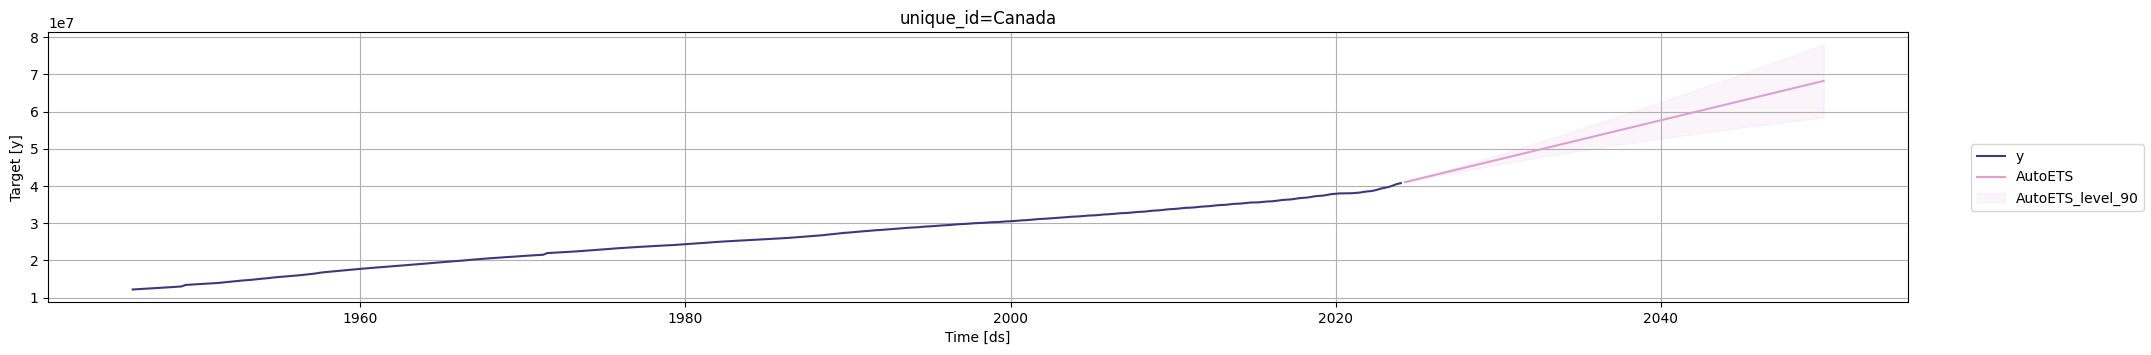

In [70]:
sf.plot(canada_data_transformed, forecast, level=[90])

# ARIMA using statsmodels

In [71]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(canada_data['VALUE'], order=(1, 1, 1))  # (p, d, q) where p=AR terms, d=differencing, q=MA terms
fitted_model = model.fit()


c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [72]:
fitted_model

In [73]:
forecast = fitted_model.forecast(steps=104)  # forecast 10 periods ahead

In [74]:
forecast

2024-04-01    4.086128e+07
2024-07-01    4.095266e+07
2024-10-01    4.104405e+07
2025-01-01    4.113543e+07
2025-04-01    4.122681e+07
                  ...     
2049-01-01    4.990150e+07
2049-04-01    4.999274e+07
2049-07-01    5.008399e+07
2049-10-01    5.017523e+07
2050-01-01    5.026647e+07
Freq: QS-OCT, Name: predicted_mean, Length: 104, dtype: float64

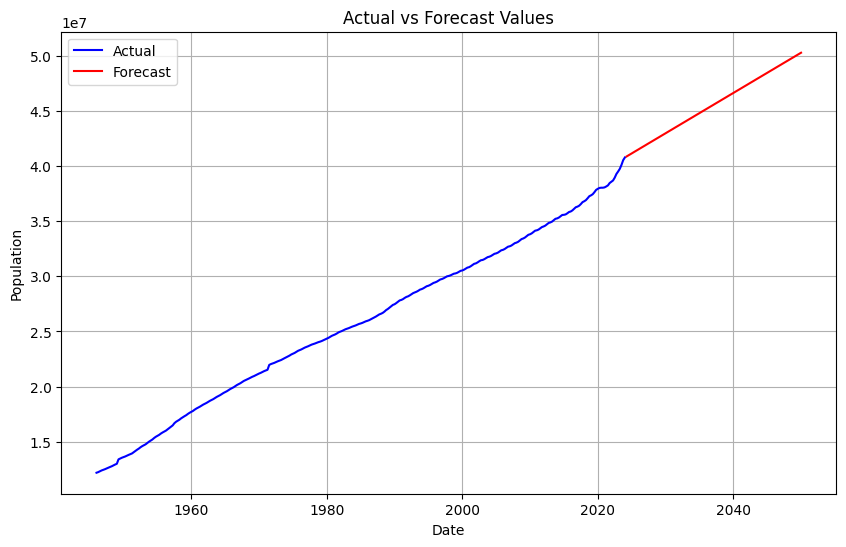

In [75]:
import matplotlib.pyplot as plt

# Assuming canada_data and forecast are already defined as specified
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(canada_data.index, canada_data['VALUE'], label='Actual', color='blue')  # Plot actual data
plt.plot(forecast.index, forecast, label='Forecast', color='red')  # Plot forecast data

# Adding title and labels
plt.title('Actual vs Forecast Values')
plt.xlabel('Date')
plt.ylabel('Population')

# Adding a legend to differentiate actual and forecast
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid for better readability of the plot
plt.show()

# Auto ARIMA using pmdarima

In [76]:
import pmdarima as pm

# Here's how to use auto_arima
model = pm.auto_arima(canada_data['VALUE'],
                      seasonal=False,  # Set to True if the data has a seasonal component
                      trace=True,  # Print summary of the fits
                      error_action='ignore',  # Don't want to know if an order does not work
                      suppress_warnings=True,  # Suppress warnings
                      stepwise=True)  # Stepwise selection to identify best model

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=7694.704, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=7665.574, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7668.777, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=7687.512, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7663.620, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=7707.246, Time=0.30 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.967 seconds


In [77]:
# Summary of the fitted model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  313
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -3830.810
Date:                Wed, 24 Apr 2024   AIC                           7663.620
Time:                        08:53:06   BIC                           7667.360
Sample:                    01-01-1946   HQIC                          7665.115
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.909e+09   6.76e+07     43.034      0.000    2.78e+09    3.04e+09
Ljung-Box (L1) (Q):                  32.19   Jarque-Bera (JB):              6003.39
Prob(Q):                              0.00   Pr

In [78]:
# Forecasting with the fitted model
n_periods = 104  # Number of periods to forecast
forecast = model.predict(n_periods=n_periods)
forecast

2024-04-01    41011384.0
2024-07-01    41252878.0
2024-10-01    41494372.0
2025-01-01    41735866.0
2025-04-01    41977360.0
                 ...    
2049-01-01    64919290.0
2049-04-01    65160784.0
2049-07-01    65402278.0
2049-10-01    65643772.0
2050-01-01    65885266.0
Freq: QS-OCT, Length: 104, dtype: float64

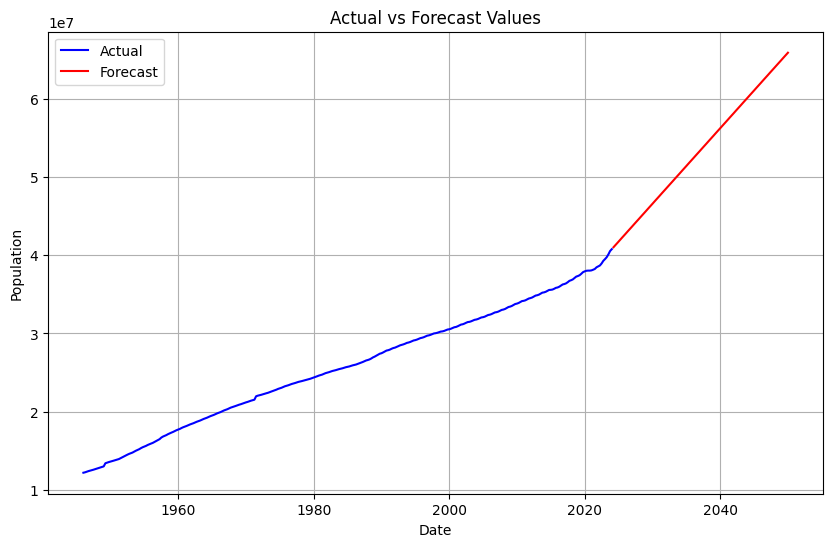

In [79]:
import matplotlib.pyplot as plt

# Assuming canada_data and forecast are already defined as specified
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(canada_data.index, canada_data['VALUE'], label='Actual', color='blue')  # Plot actual data
plt.plot(forecast.index, forecast, label='Forecast', color='red')  # Plot forecast data

# Adding title and labels
plt.title('Actual vs Forecast Values')
plt.xlabel('Date')
plt.ylabel('Population')

# Adding a legend to differentiate actual and forecast
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid for better readability of the plot
plt.show()

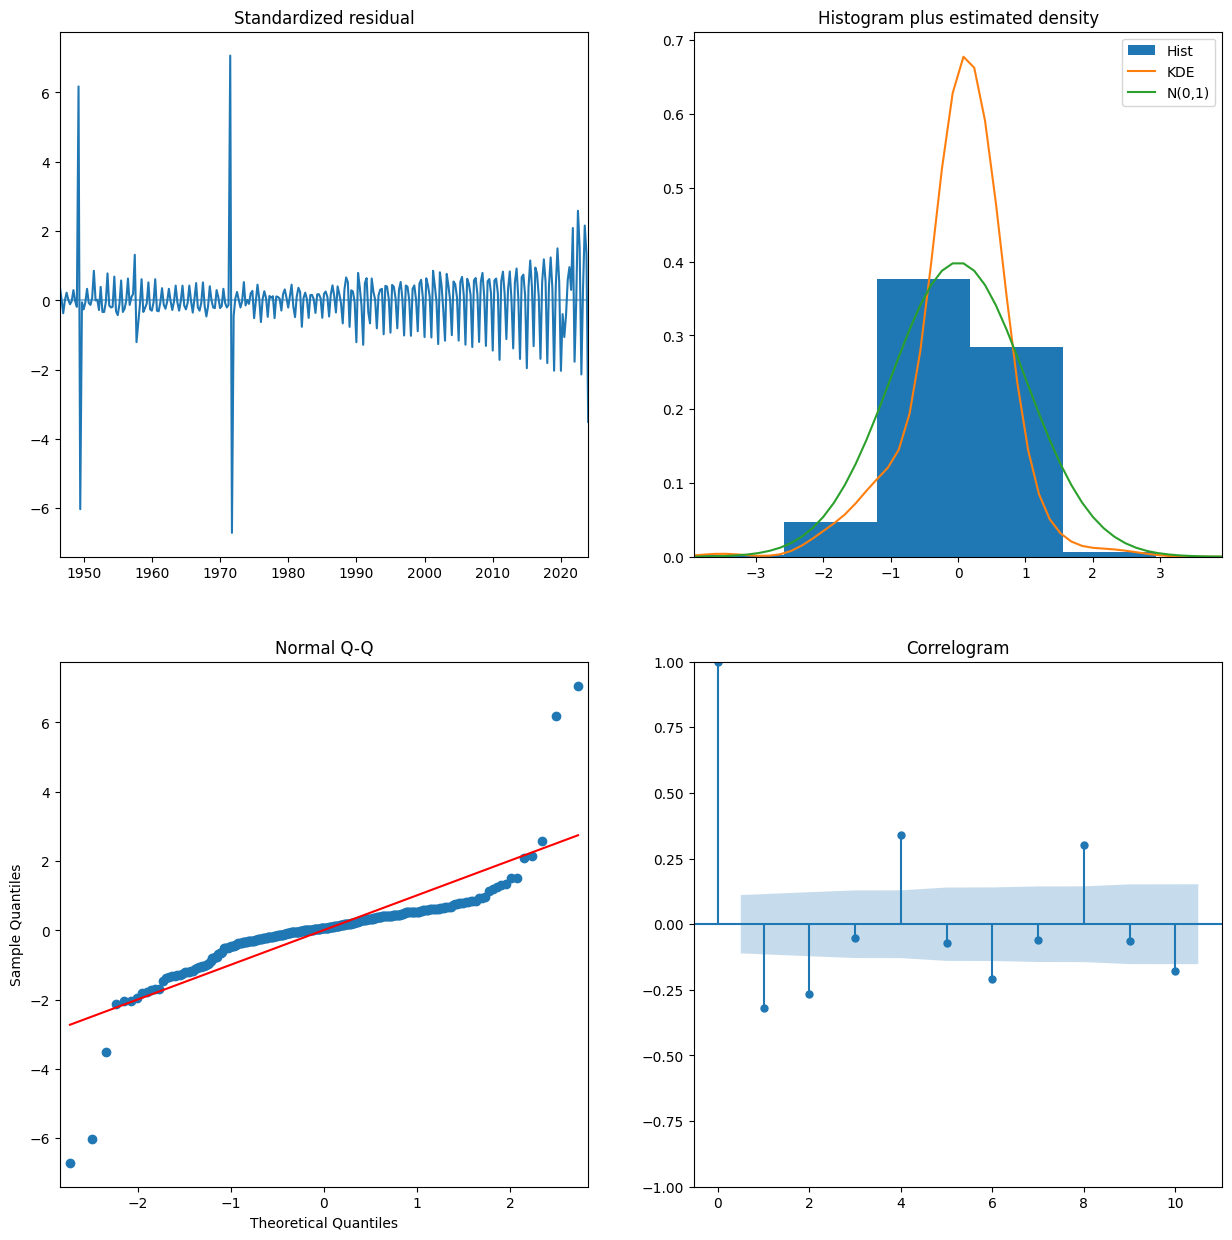

In [80]:
model.plot_diagnostics(figsize=(15, 15));

# AutoARIMA using statsforecast

In [81]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# Initialize the StatsForecast with the AutoETS model
sf = StatsForecast(df=canada_data_transformed, models=[AutoARIMA()], freq='qs', verbose=True)

# Fit the model on the historical data
sf.fit()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [82]:
# Forecast the next 104 points (since the data is quarterly, 104 points cover 26 years)
forecast = sf.predict(h=104, level=[90])
forecast

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
Canada,2024-04-01,41047440.0,40975292.0,41119584.0
Canada,2024-07-01,41391092.0,41265148.0,41517036.0
Canada,2024-10-01,41726428.0,41555160.0,41897692.0
Canada,2025-01-01,42031148.0,41806660.0,42255636.0
Canada,2025-04-01,42335964.0,42045512.0,42626420.0
...,...,...,...,...
Canada,2049-01-01,72277800.0,53895384.0,90660224.0
Canada,2049-04-01,72592920.0,53937808.0,91248024.0
Canada,2049-07-01,72908032.0,53978896.0,91837160.0


c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:1329: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


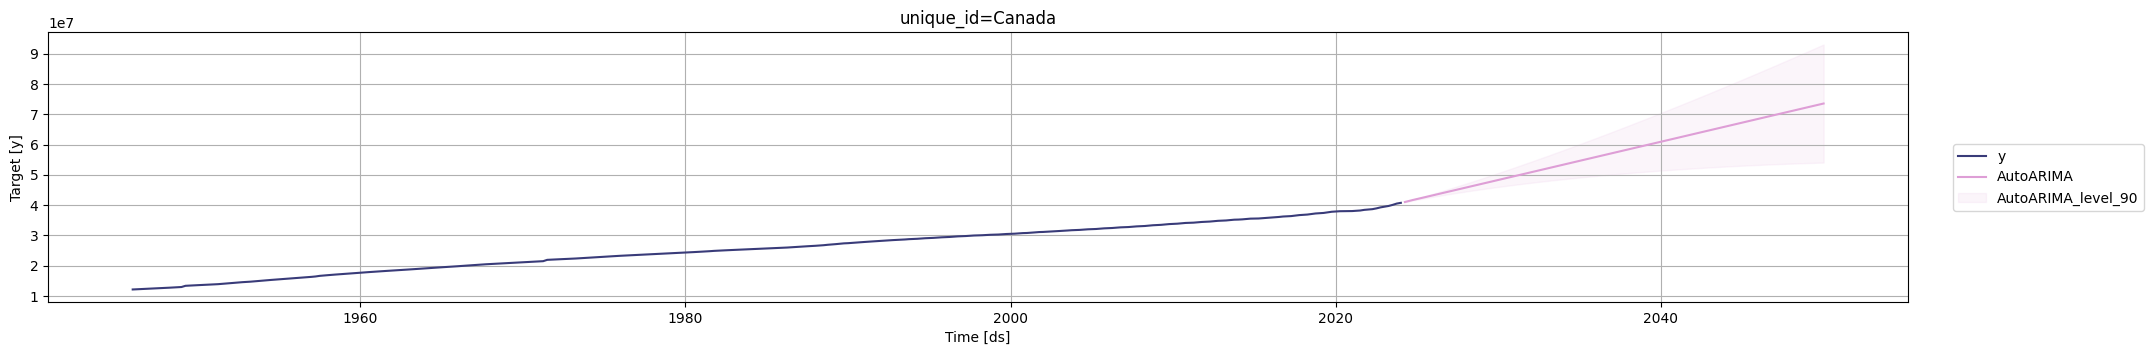

In [83]:
sf.plot(canada_data_transformed, forecast, level=[90])

# Multiple Models using statsforecast

In [84]:
from statsforecast.models import (
    HoltWinters,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [85]:
# Create a list of models and instantiation parameters
models = [
    AutoARIMA(),
    AutoETS(),
    #HoltWinters(),
    #HistoricAverage(),
    #DOT(season_length=4)
]

In [86]:
# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq='qs', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
    df=canada_data_transformed, 
)

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [87]:
sf.fit()

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA,AutoETS])

In [88]:
# Forecast the next 104 points (since the data is quarterly, 104 points cover 26 years)
forecast = sf.predict(h=104, level=[90])
forecast

c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,AutoETS,AutoETS-lo-90,AutoETS-hi-90
unique_id,,,,,,,
Canada,2024-04-01,41047440.0,40975292.0,41119584.0,41034064.0,40958728.0,41109396.0
Canada,2024-07-01,41391092.0,41265148.0,41517036.0,41298232.0,41180608.0,41415860.0
Canada,2024-10-01,41726428.0,41555160.0,41897692.0,41562404.0,41404500.0,41720308.0
Canada,2025-01-01,42031148.0,41806660.0,42255636.0,41826576.0,41628032.0,42025120.0
Canada,2025-04-01,42335964.0,42045512.0,42626420.0,42090748.0,41850444.0,42331052.0
...,...,...,...,...,...,...,...
Canada,2049-01-01,72277800.0,53895384.0,90660224.0,67187032.0,57926824.0,76447240.0
Canada,2049-04-01,72592920.0,53937808.0,91248024.0,67451200.0,58057768.0,76844640.0
Canada,2049-07-01,72908032.0,53978896.0,91837160.0,67715376.0,58188076.0,77242672.0


c:\Users\owner\anaconda3\envs\mma867\Lib\site-packages\statsforecast\core.py:1329: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


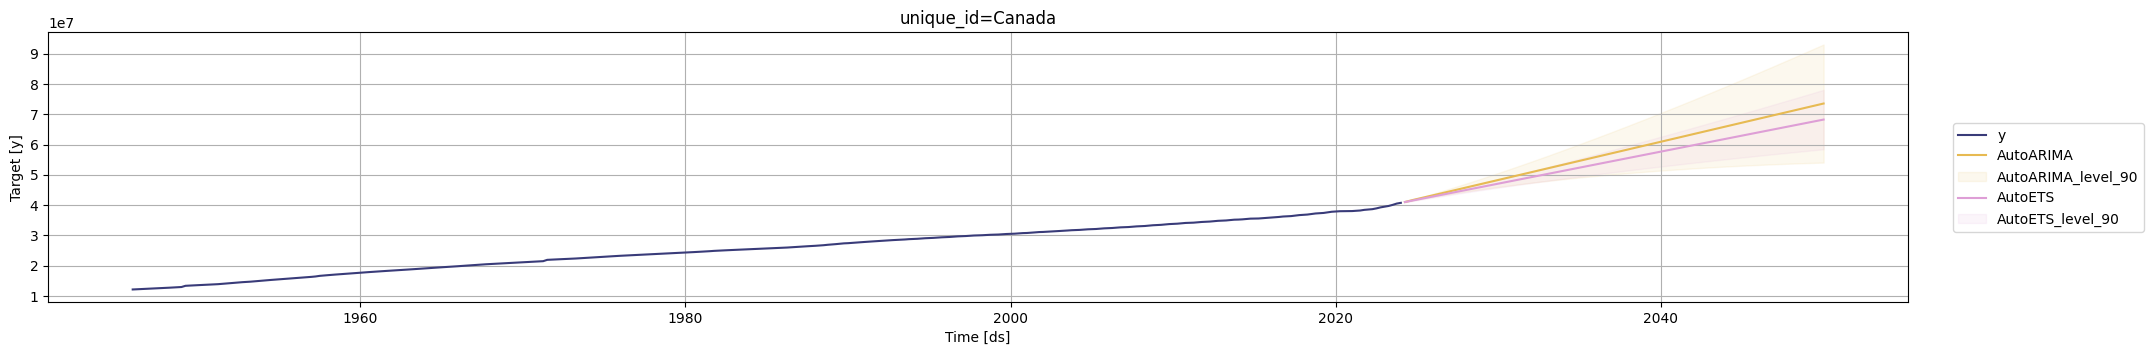

In [89]:
sf.plot(canada_data_transformed, forecast, level=[90])

In [90]:
forecast.to_csv('canada_population_forecast.csv', index=False)